## **Pre-Processing and EDA of 'train' dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [7]:
df['Loan_Status'].value_counts(normalize=True)


,proportion
Loan_Status,
Y,0.687296
N,0.312704


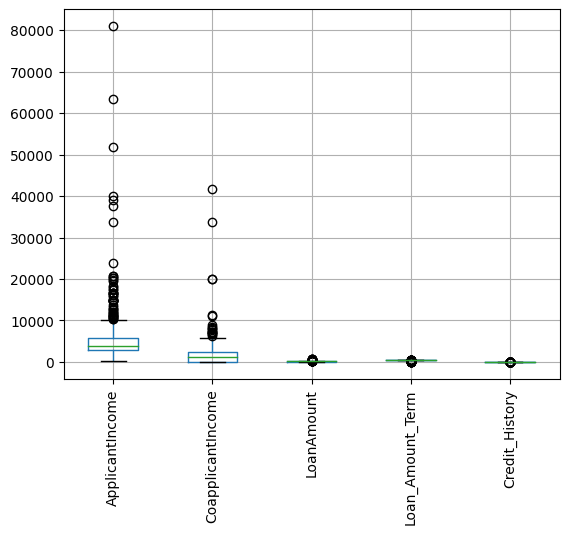

In [8]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [9]:
df.drop(['Loan_ID'],inplace=True,axis=1)

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


In [12]:
df=pd.get_dummies(df,dtype='int64')
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


<ipython-input-13-04f21d44feb2>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


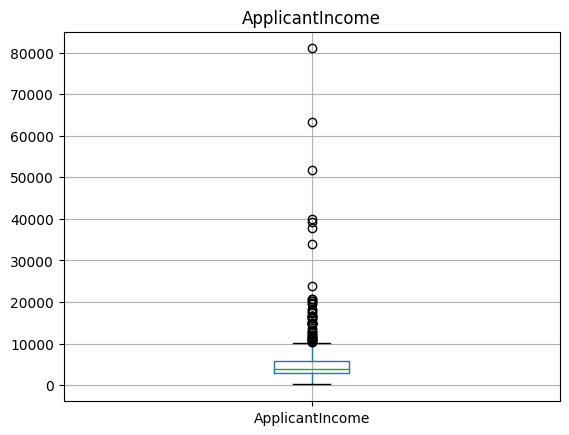

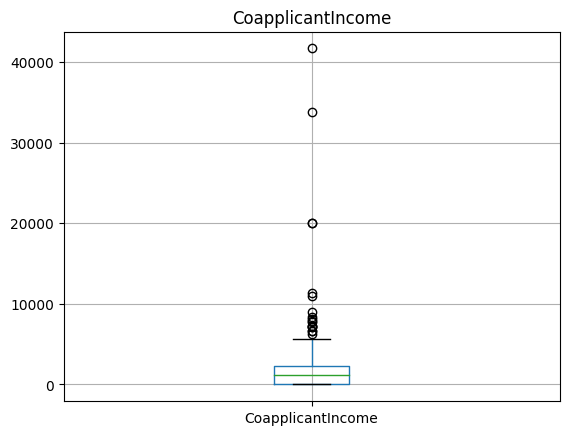

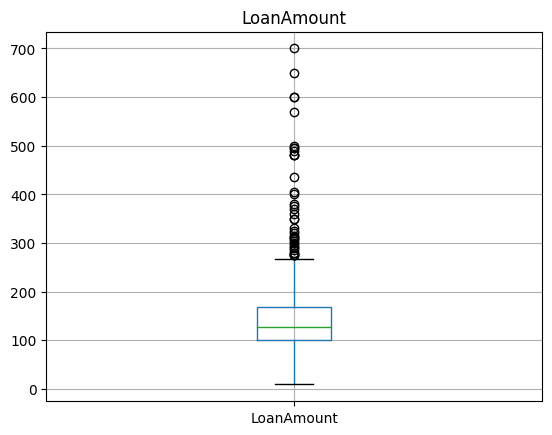

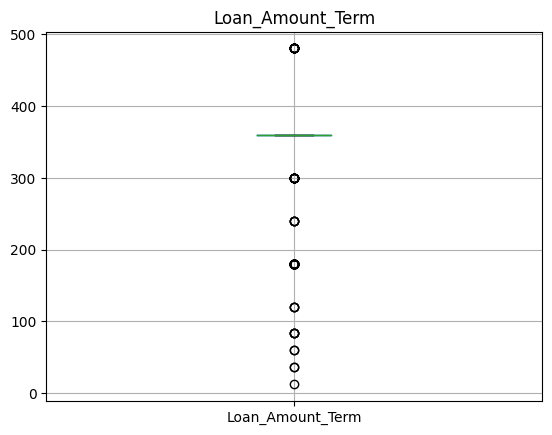

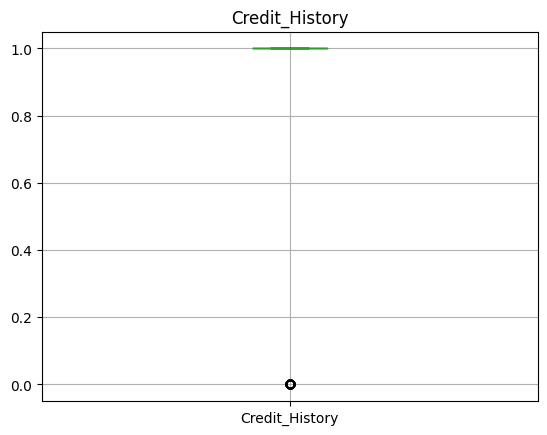

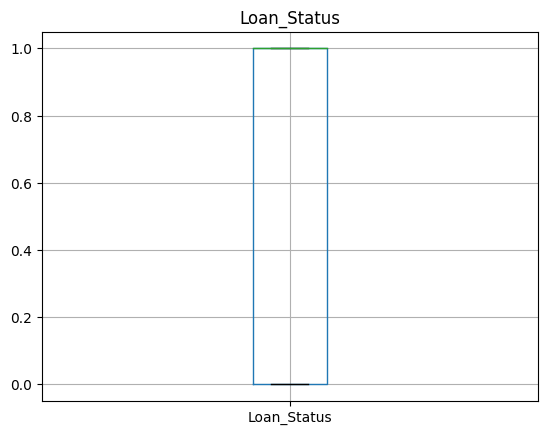

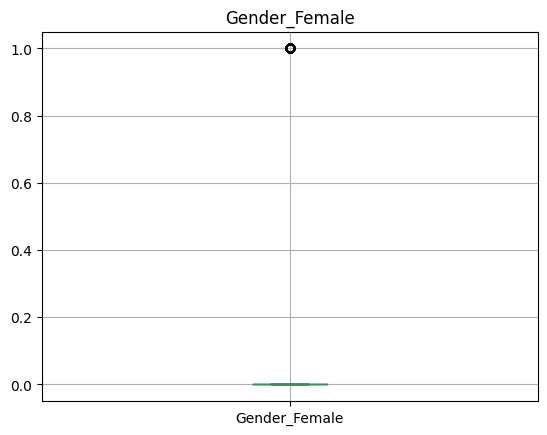

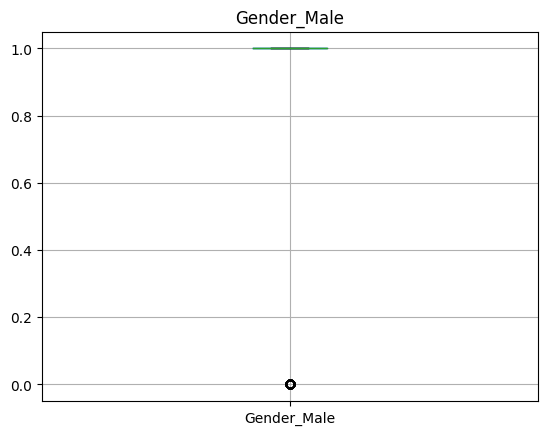

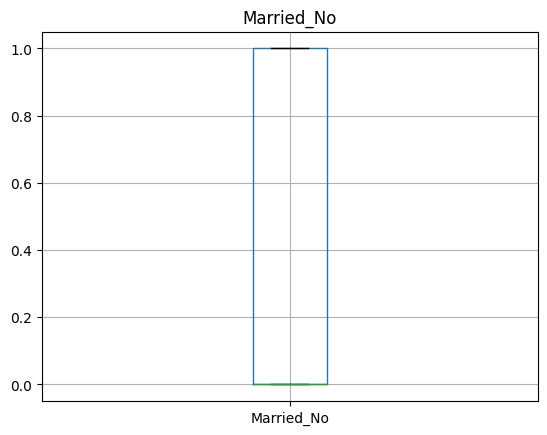

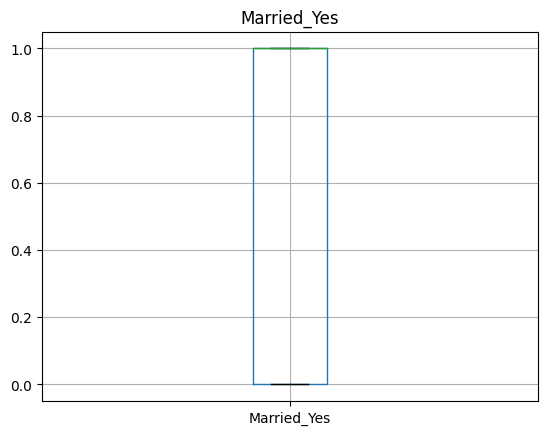

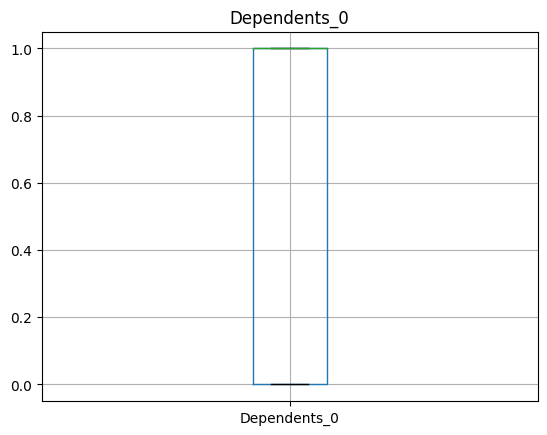

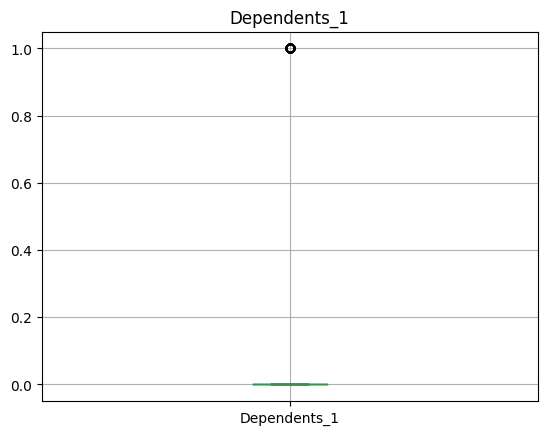

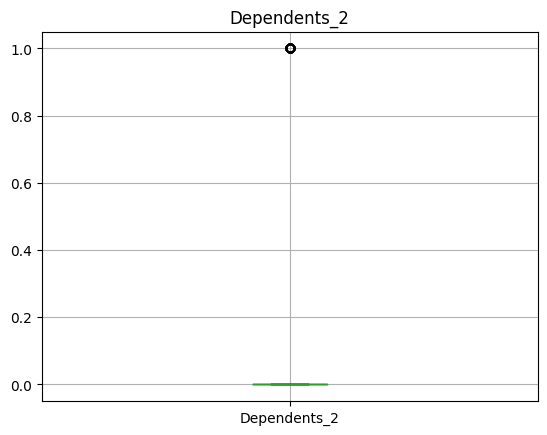

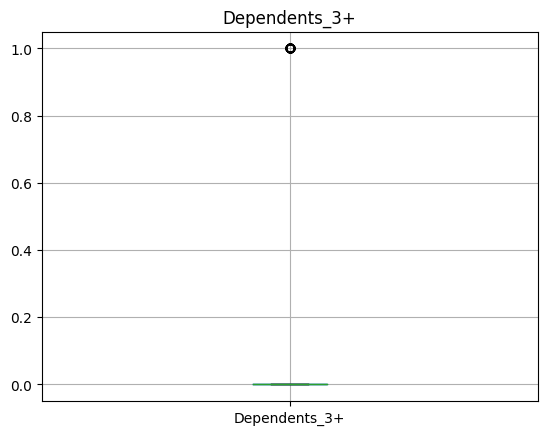

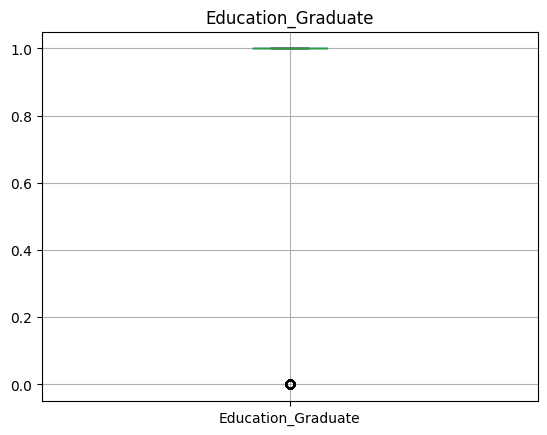

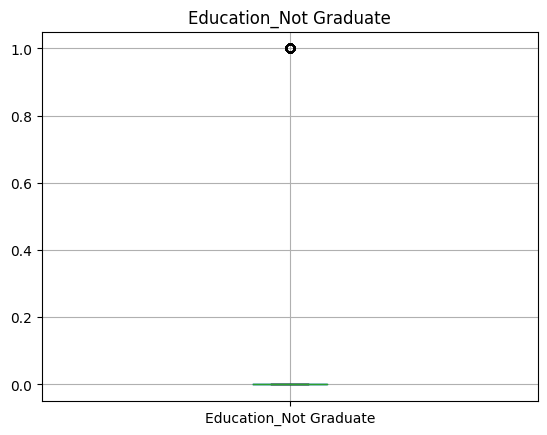

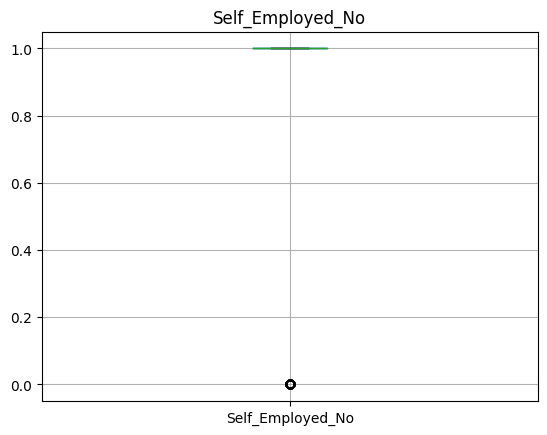

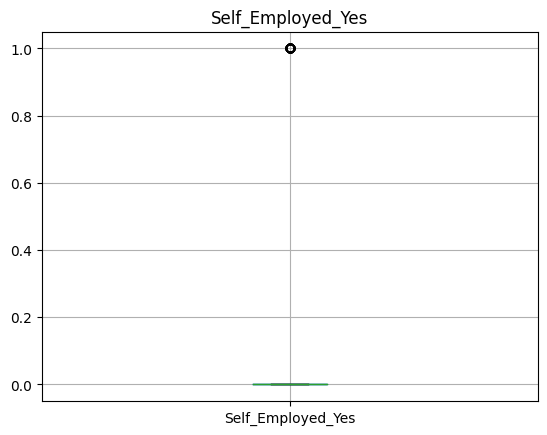

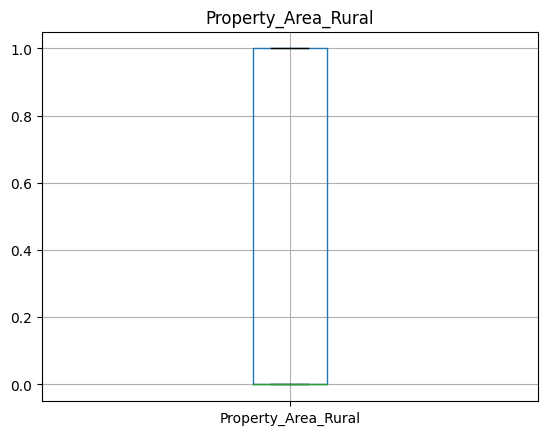

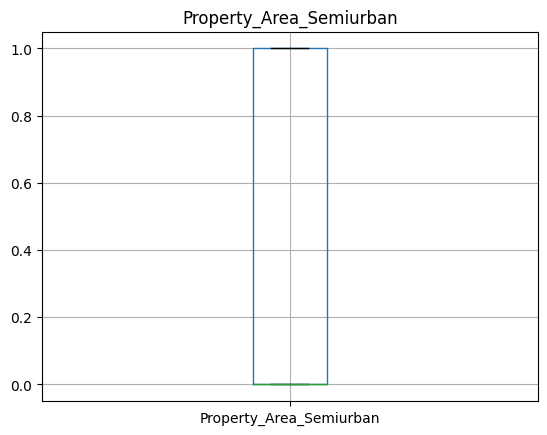

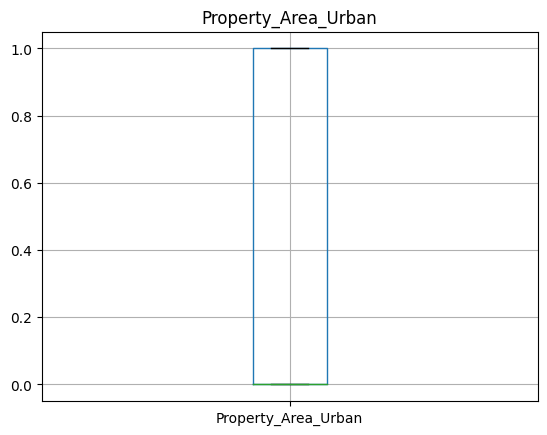

In [13]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure()
    df.boxplot([col])
    plt.title(col)

In [14]:
for col in df.columns:
  if df[col].dtype !='object':
    q1=df[col].quantile(0.25)
    q2=df[col].quantile(0.75)

    iqr=q2-q1


    upper=q2+1.5*iqr
    lower=q1-1.5*iqr
    df[col]=np.where(df[col]>upper,upper,df[col])
    df[col]=np.where(df[col]<lower,lower,df[col])


<ipython-input-15-e889cb5dada1>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


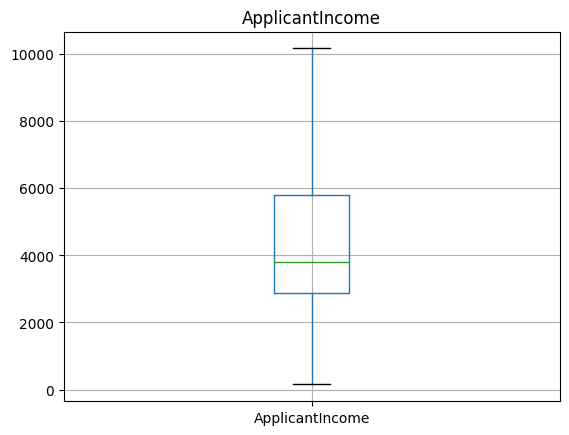

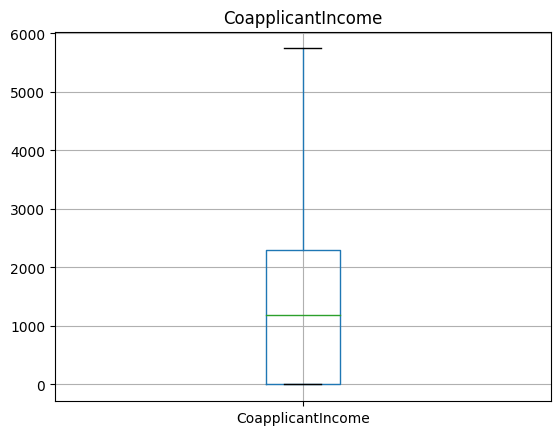

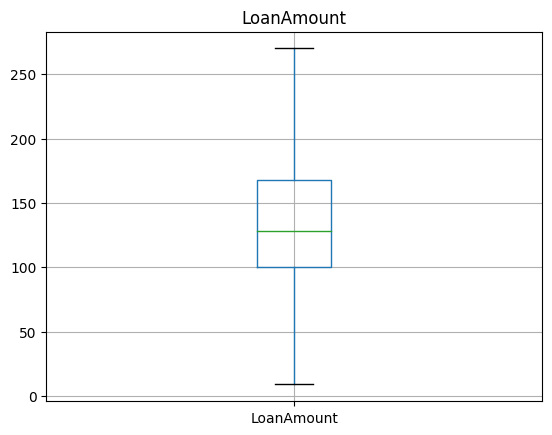

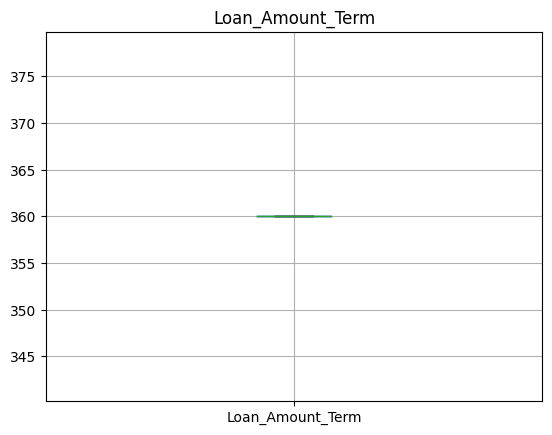

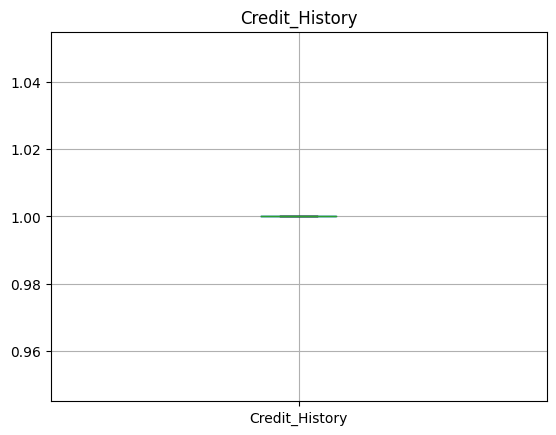

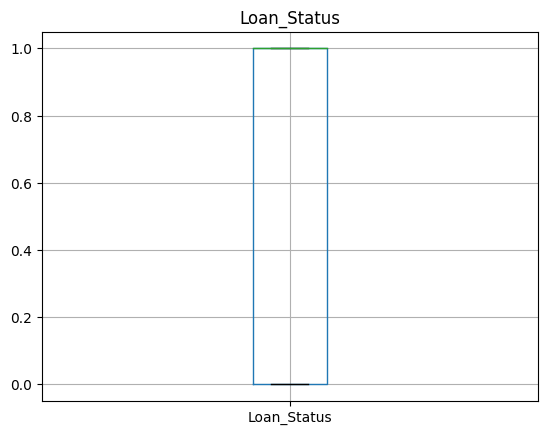

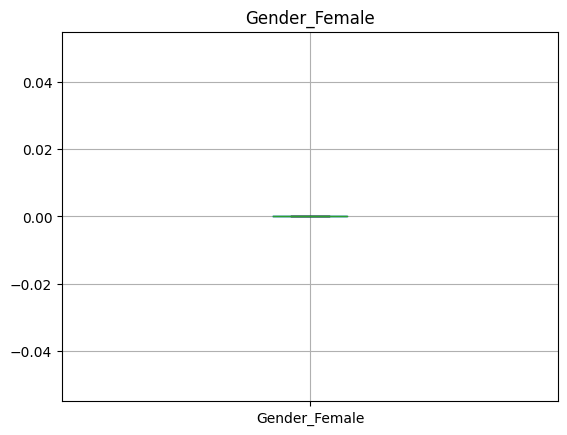

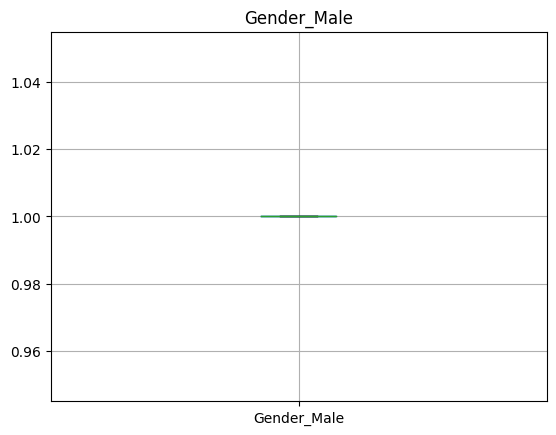

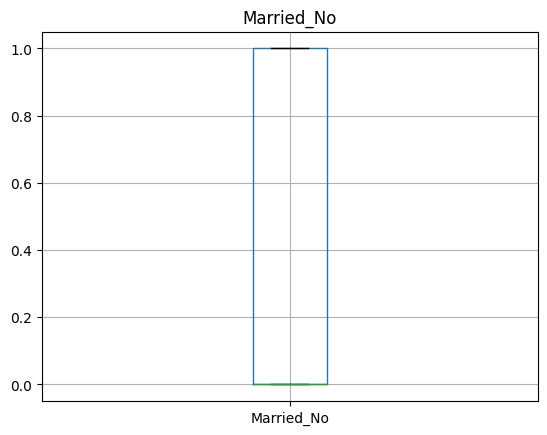

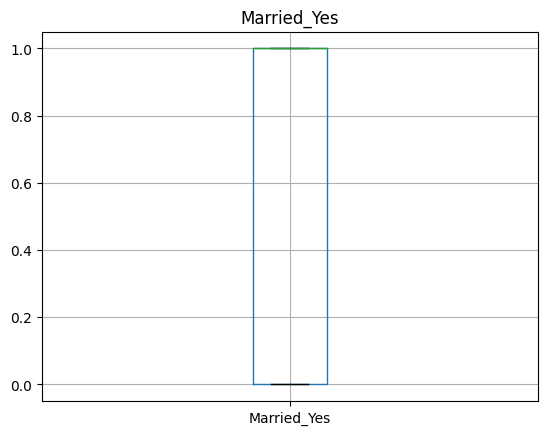

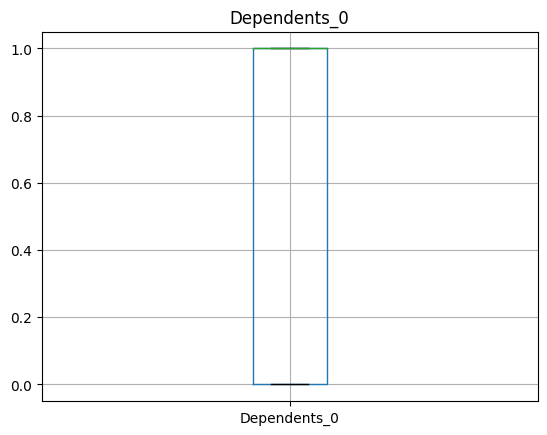

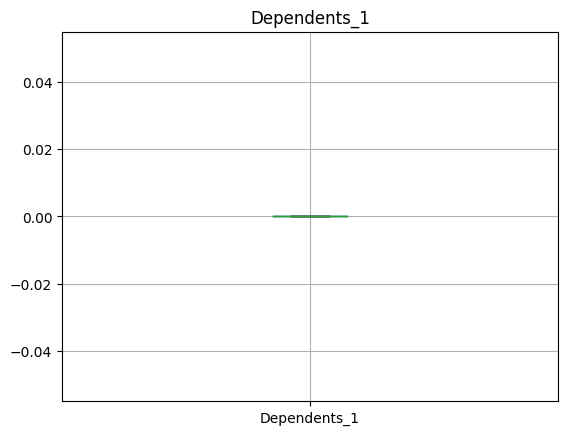

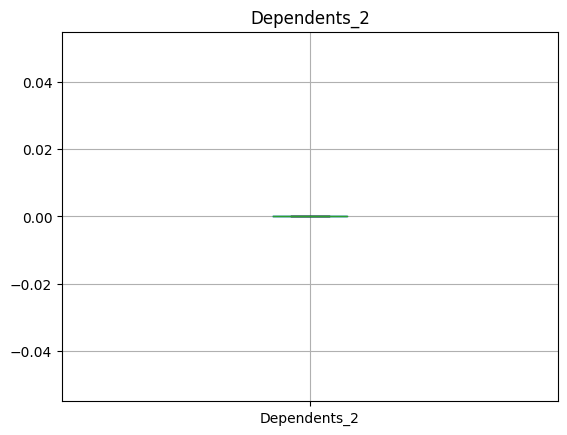

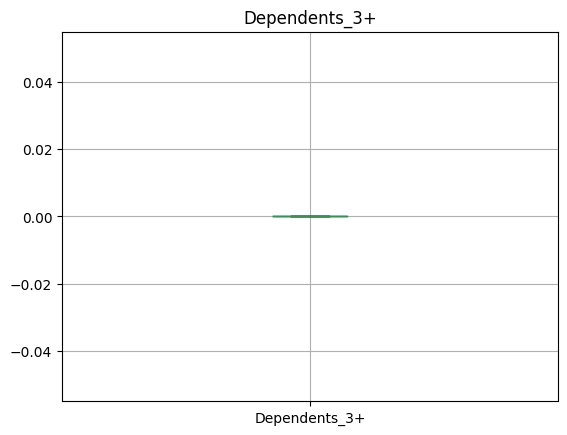

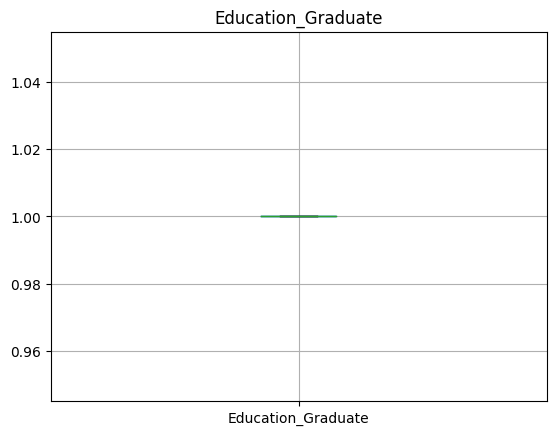

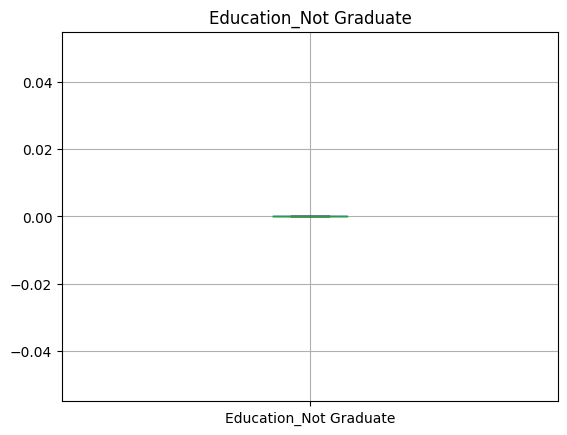

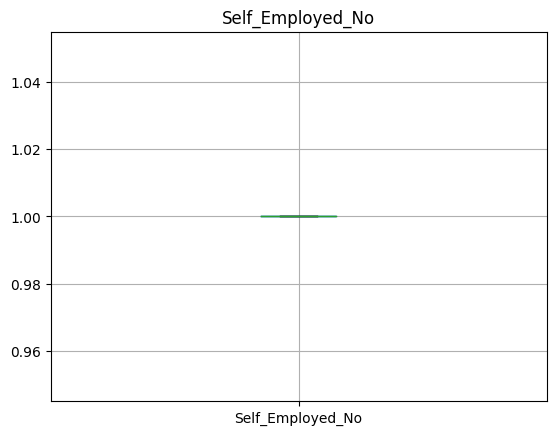

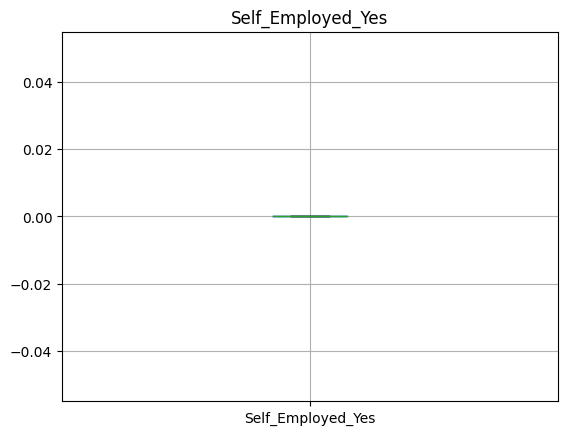

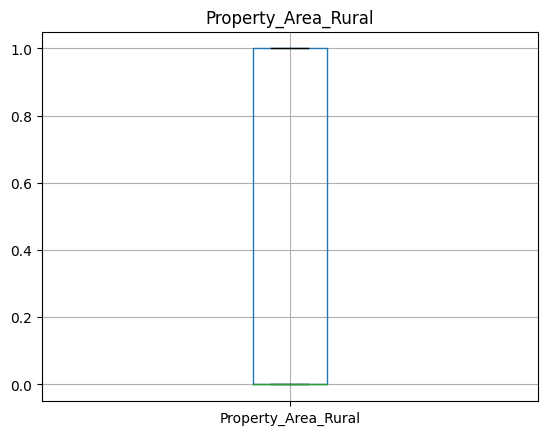

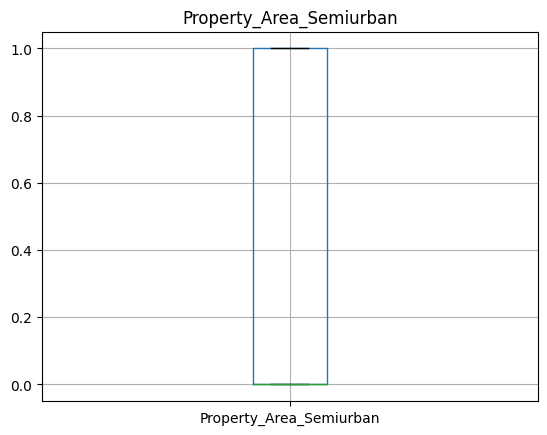

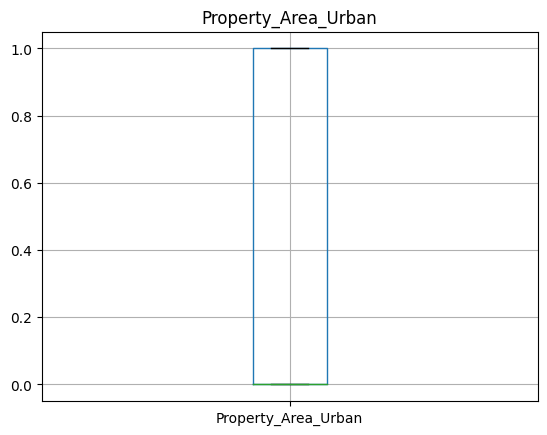

In [15]:
for col in df.columns:
  if df[col].dtype !='object':
    plt.figure()
    df.boxplot([col])
    plt.title(col)

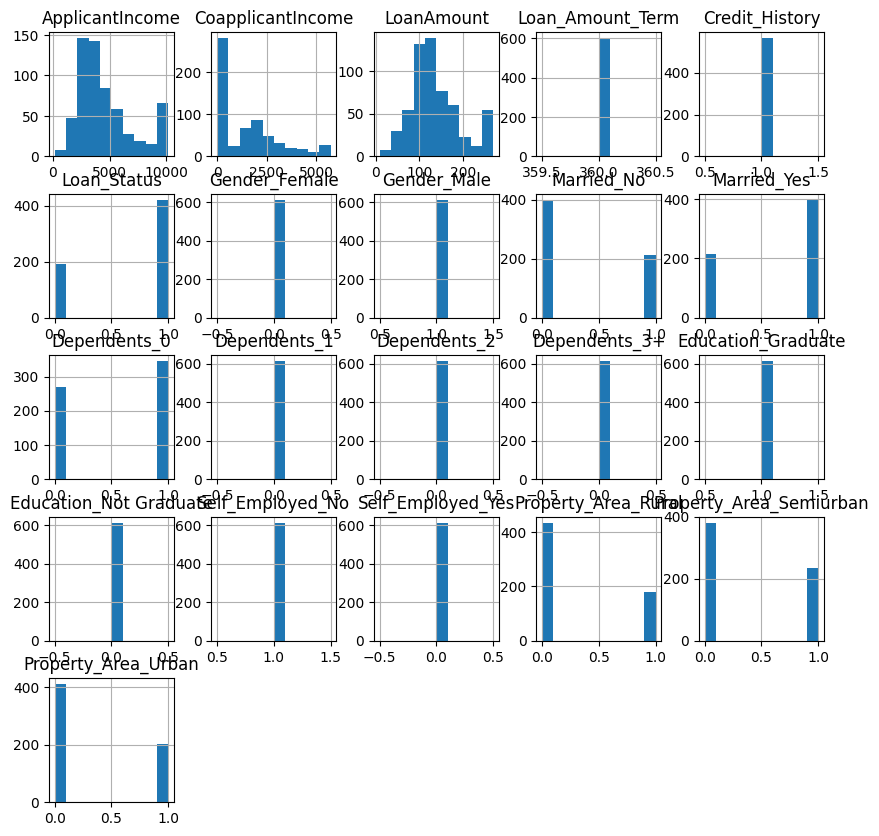

In [16]:
df.hist(figsize=(10,10))
plt.show()

In [17]:
df.isna().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50
Loan_Status,0
Gender_Female,0
Gender_Male,0
Married_No,0
Married_Yes,0


In [18]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)

In [19]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000.0,0.0,66.0,360.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,6000.0,0.0,141.0,360.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [20]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
df['ApplicantIncome']=scaler.fit_transform(df[['ApplicantIncome']])
df['CoapplicantIncome']=scaler.fit_transform(df[['CoapplicantIncome']])
df['LoanAmount']=scaler.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term']=scaler.fit_transform(df[['Loan_Amount_Term']])
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.497164,-0.874587,-0.174056,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.013767,0.054395,-0.174056,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.652632,-0.874587,-1.261885,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.820924,0.578025,-0.314421,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.558104,-0.874587,0.054037,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## **Pre-Processing and EDA of 'test' Dataset**

In [21]:
test=pd.read_csv('/content/test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [22]:
test.drop('Loan_ID',inplace=True,axis=1)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [24]:
test.isna().sum()

,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6
Credit_History,29


In [25]:
test=pd.get_dummies(test,dtype='int64')
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,NaN,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


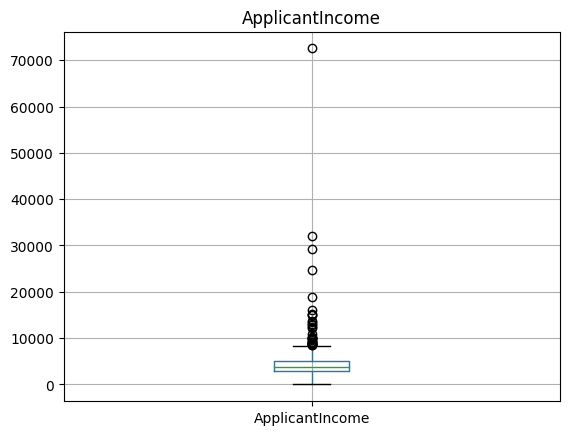

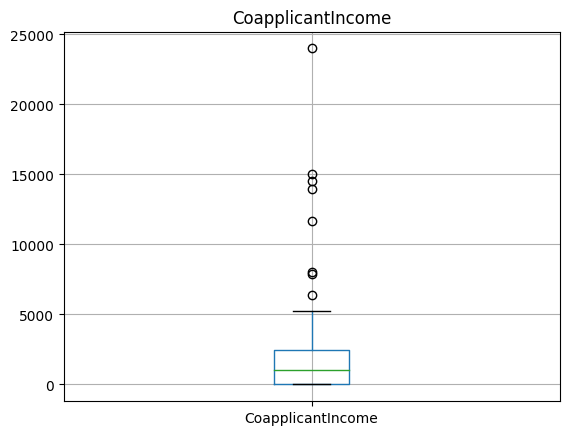

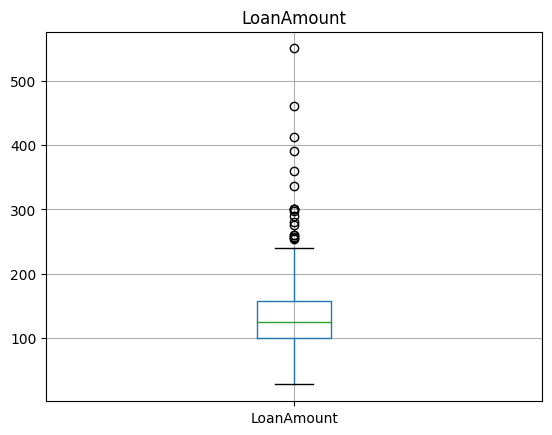

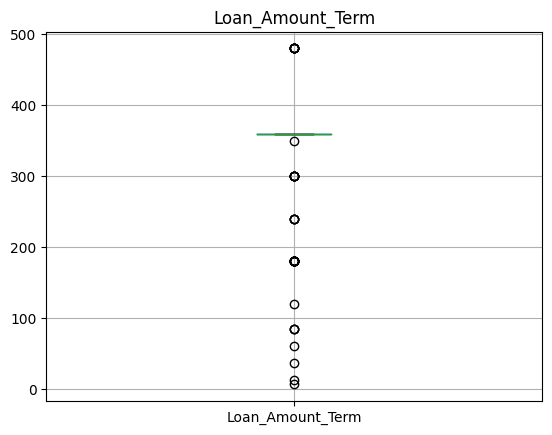

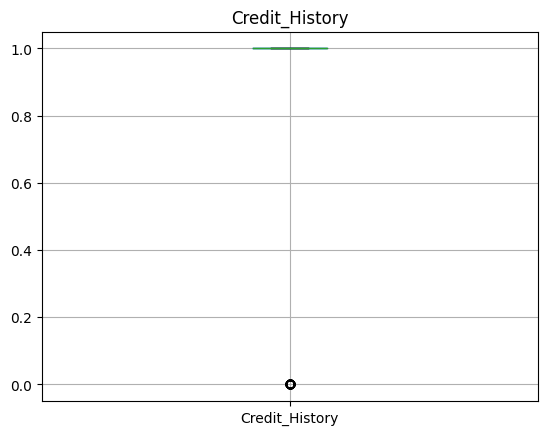

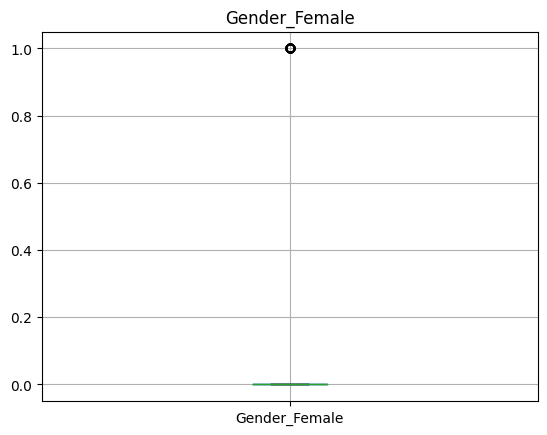

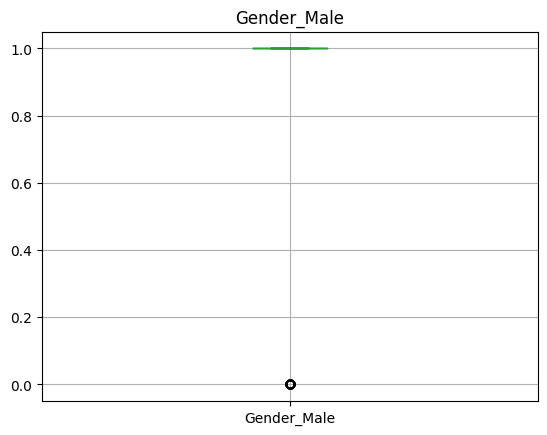

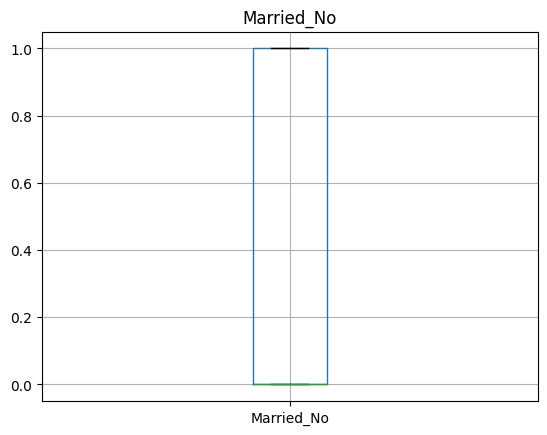

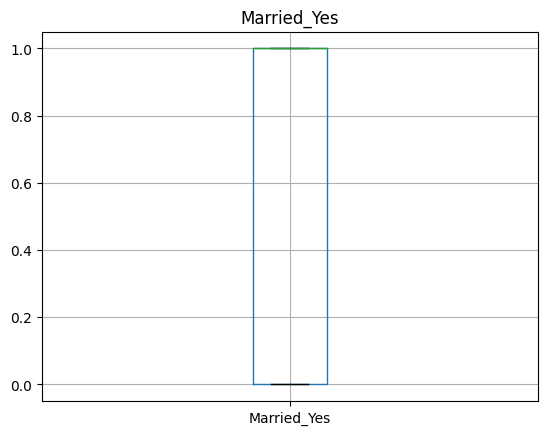

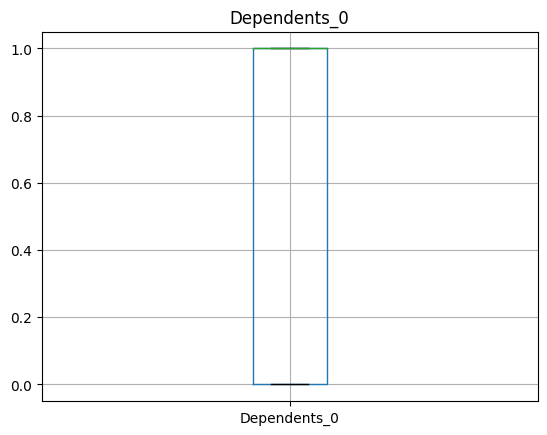

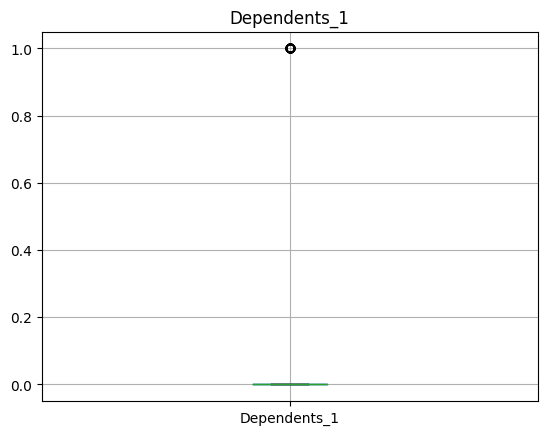

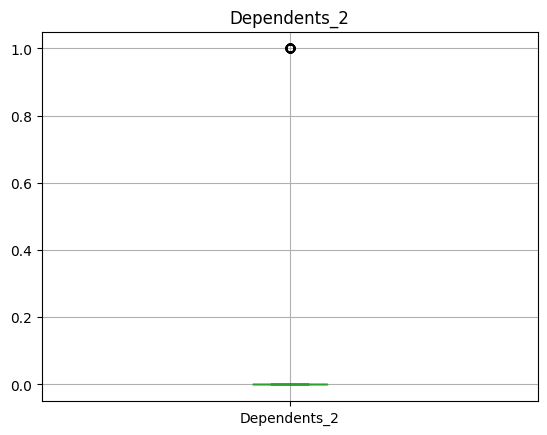

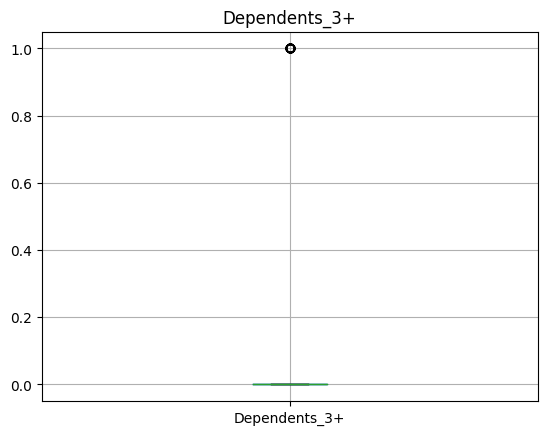

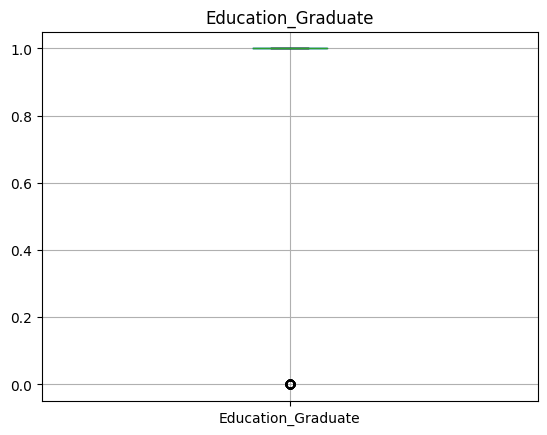

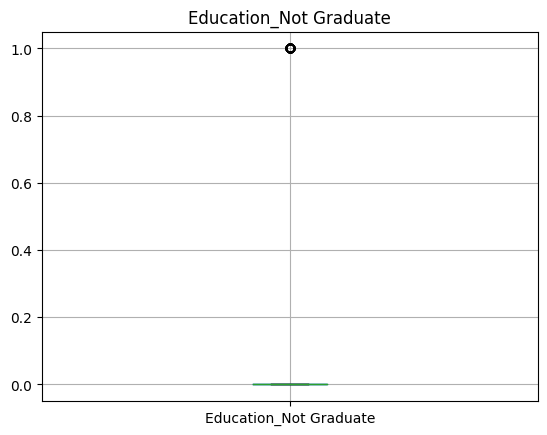

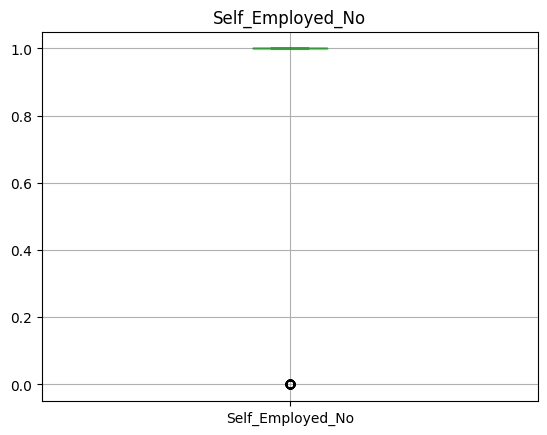

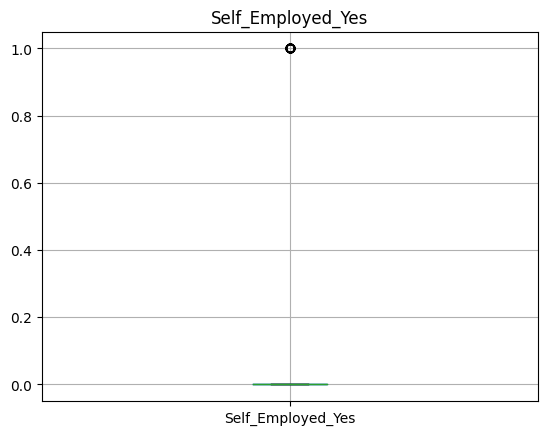

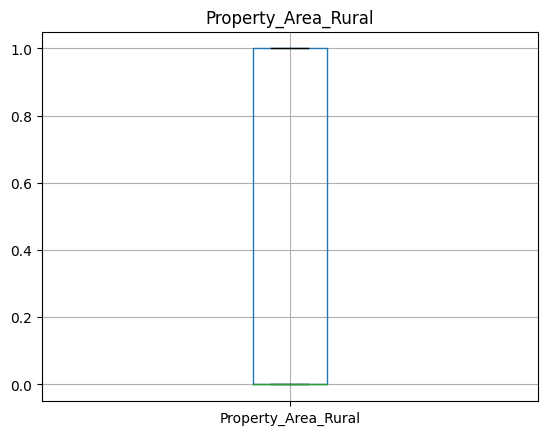

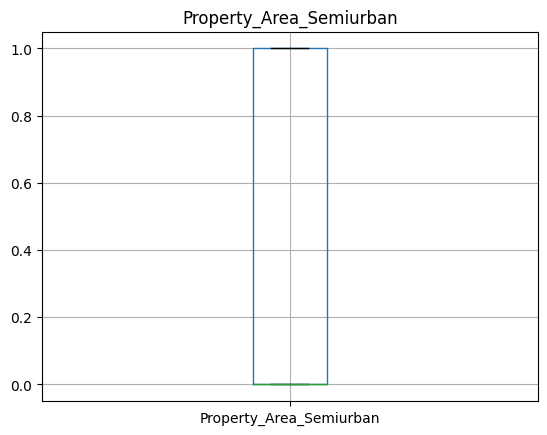

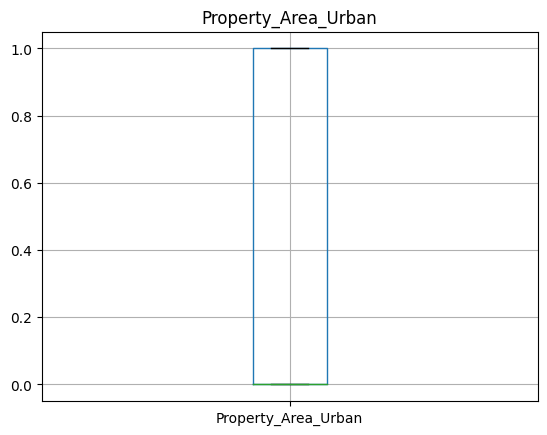

In [26]:
for col in test.columns:
  if test[col].dtype != 'object':
    plt.figure()
    test.boxplot([col])
    plt.title(col)

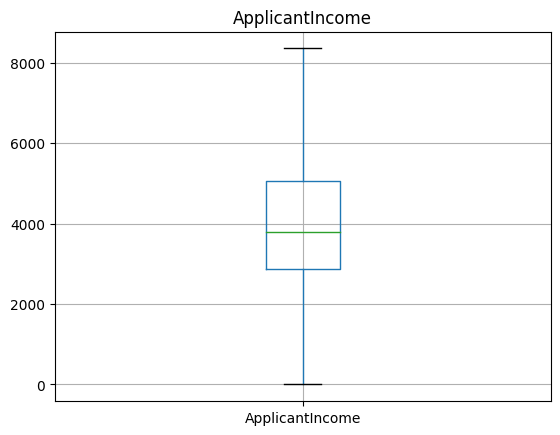

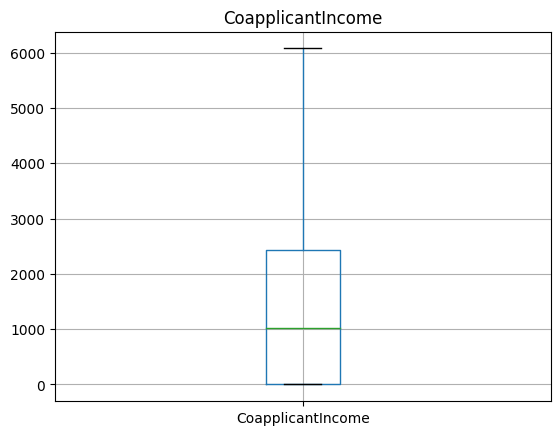

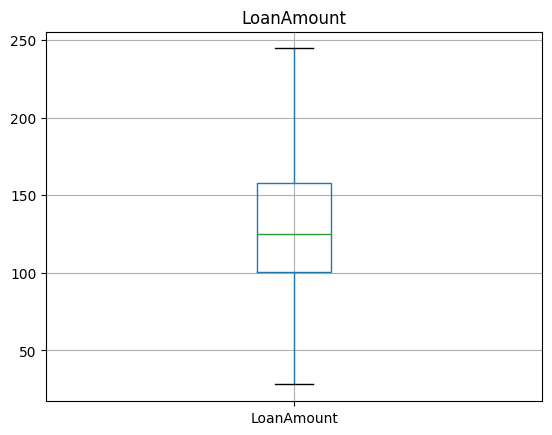

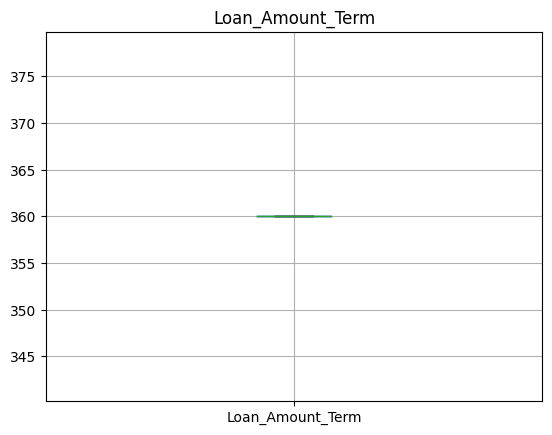

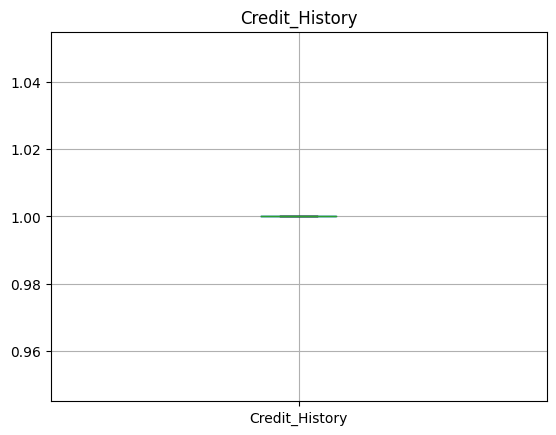

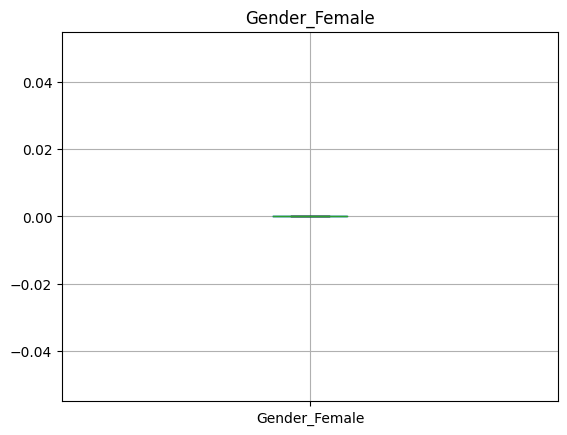

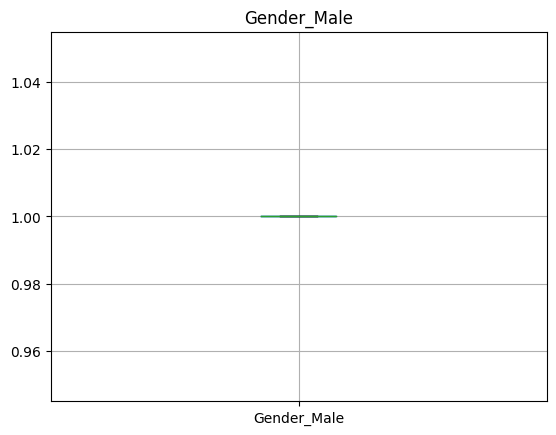

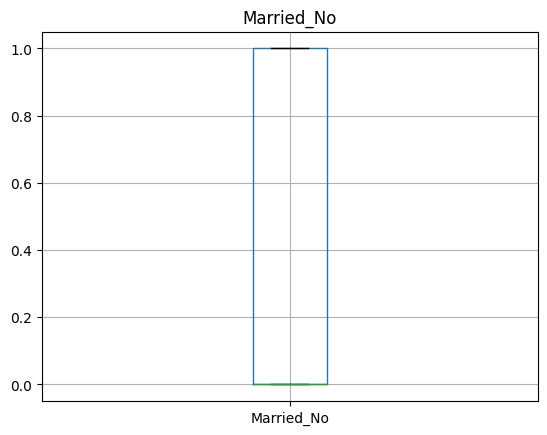

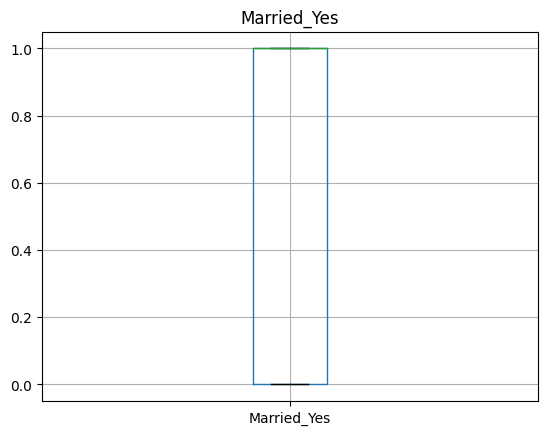

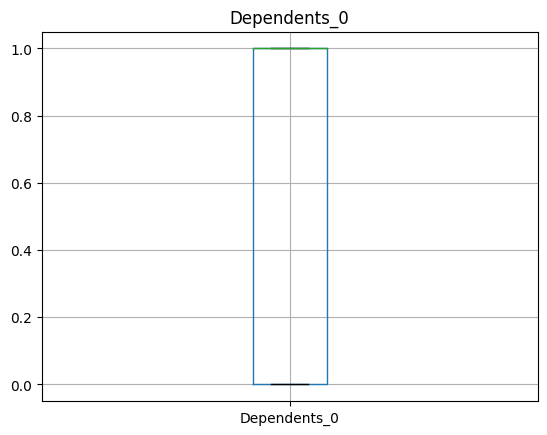

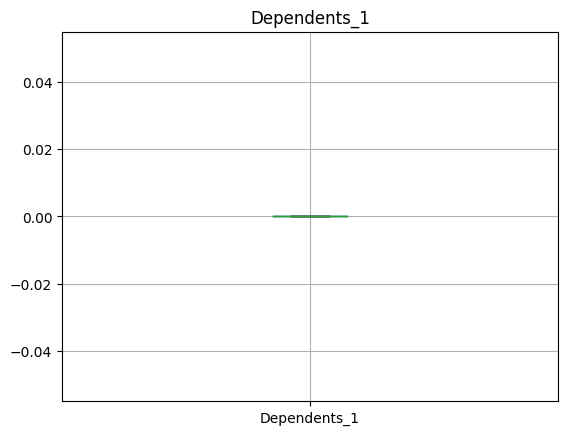

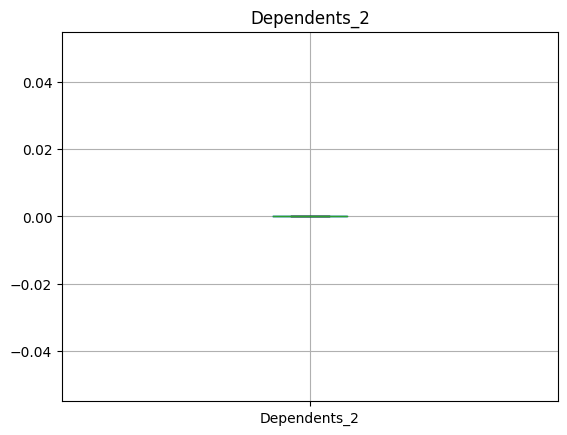

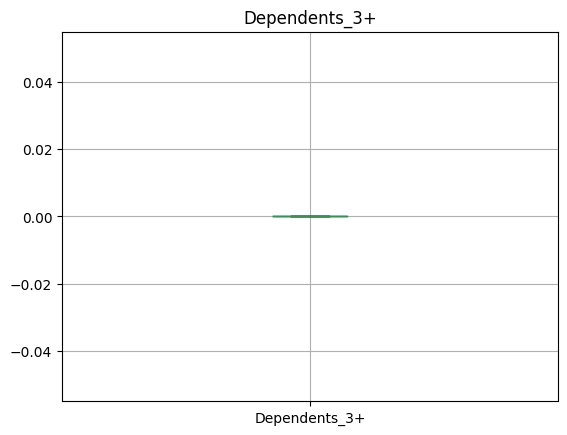

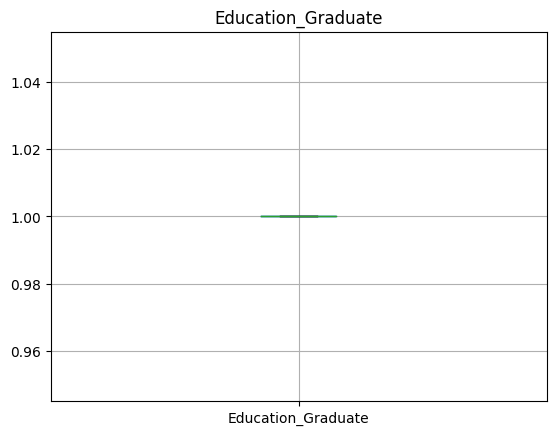

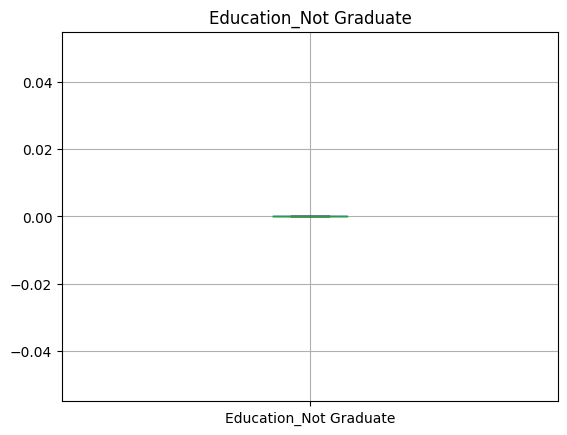

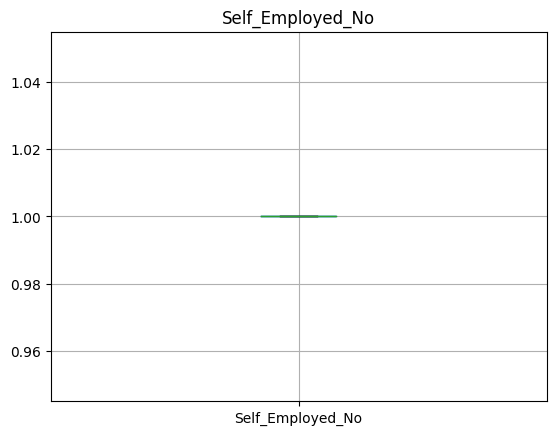

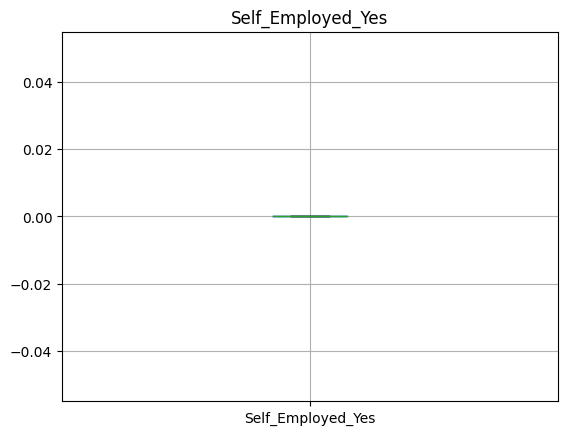

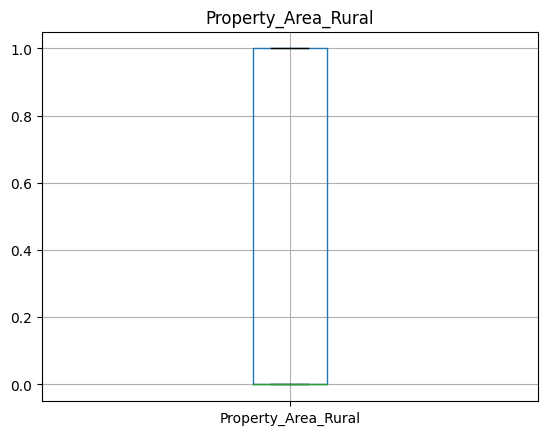

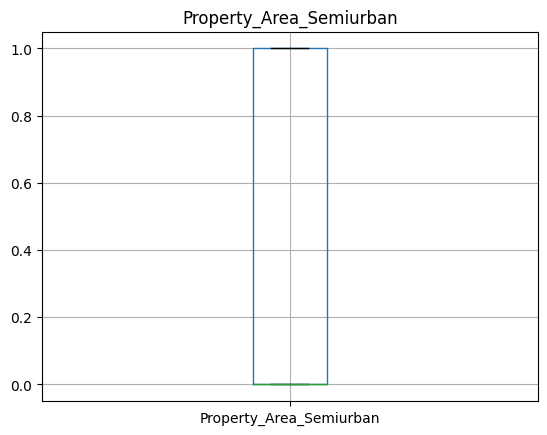

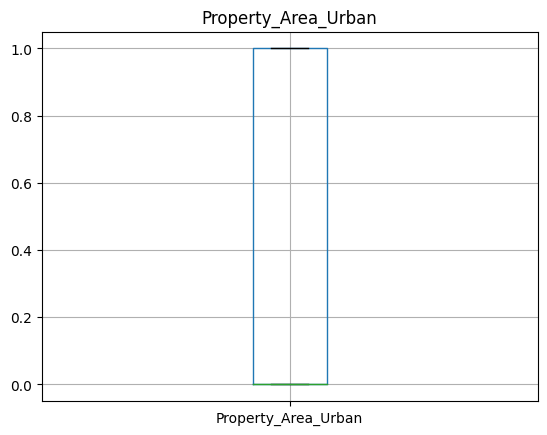

In [27]:
for col in test.columns:
  if test[col].dtype !='object':
    q1=test[col].quantile(0.25)
    q2=test[col].quantile(0.75)

    iqr=q2-q1


    upper=q2+1.5*iqr
    lower=q1-1.5*iqr
    test[col]=np.where(test[col]>upper,upper,test[col])
    test[col]=np.where(test[col]<lower,lower,test[col])


for col in test.columns:
  if test[col].dtype != 'object':
    plt.figure()
    test.boxplot([col])
    plt.title(col)

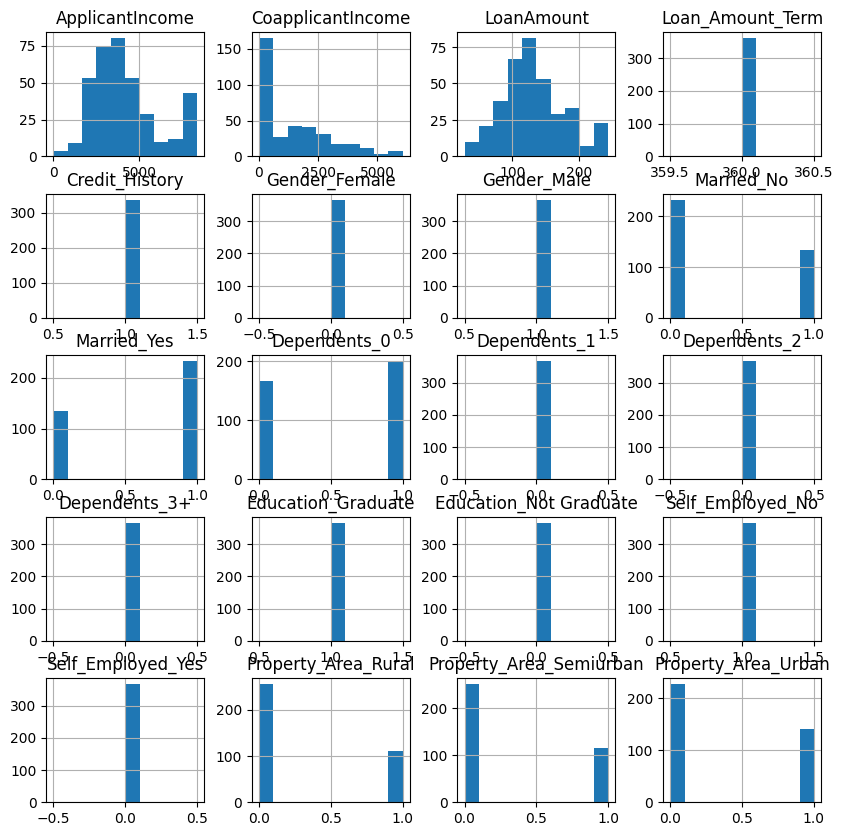

In [28]:
test.hist(figsize=(10,10))
plt.show()

In [29]:
test.isna().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6
Credit_History,29
Gender_Female,0
Gender_Male,0
Married_No,0
Married_Yes,0
Dependents_0,0


In [30]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)
test['Credit_History'].fillna(test['Credit_History'].median(),inplace=True)
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720.0,0.0,110.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3076.0,1500.0,126.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,5000.0,1800.0,208.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2340.0,2546.0,100.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3276.0,0.0,78.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
test['ApplicantIncome']=scaler.fit_transform(test[['ApplicantIncome']])
test['CoapplicantIncome']=scaler.fit_transform(test[['CoapplicantIncome']])
test['LoanAmount']=scaler.fit_transform(test[['LoanAmount']])
test['Loan_Amount_Term']=scaler.fit_transform(test[['Loan_Amount_Term']])
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.760162,-0.892107,-0.468286,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.596907,0.046623,-0.128860,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.390612,0.234369,1.610700,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.974669,0.701230,-0.680428,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.494255,-0.892107,-1.147139,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## **Spliting and Train the Model**

In [32]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.497164,-0.874587,-0.174056,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.013767,0.054395,-0.174056,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.652632,-0.874587,-1.261885,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.820924,0.578025,-0.314421,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.558104,-0.874587,0.054037,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [33]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## **Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('recall score is:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Accuracy is: 0.6422764227642277
Precision is: 0.6475409836065574
recall score is: 0.9875
f1_score: 0.7821782178217822


## **KNn**

In [37]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

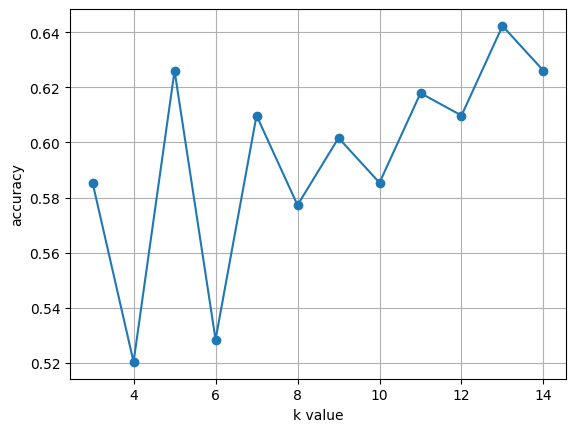

In [38]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [39]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('recall score is:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Accuracy is: 0.6422764227642277
Precision is: 0.6607142857142857
recall score is: 0.925
f1_score: 0.7708333333333333


## **SVM**

In [40]:
from sklearn.svm import SVC
sv_clf=SVC(kernel='linear')
sv_clf.fit(x_train,y_train)
y_pred=sv_clf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('recall score is:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Accuracy is : 0.6504065040650406
Precision is: 0.6504065040650406
recall score is: 1.0
f1_score: 0.7881773399014779


## **Decision Tree**

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('recall score is:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Accuracy is : 0.5447154471544715
Precision is: 0.6395348837209303
recall score is: 0.6875
f1_score: 0.6626506024096386


## **Randomn Forest**

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test,y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is:  0.5691056910569106
Precision is 0.6363636363636364
Recall is 0.7875
f1 score is 0.7039106145251396


In [43]:
print(test.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [44]:
test['Loan_Status'] = model.predict(test)
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.760162,-0.892107,-0.468286,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-0.596907,0.046623,-0.128860,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.390612,0.234369,1.610700,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.974669,0.701230,-0.680428,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,-0.494255,-0.892107,-1.147139,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.118032,0.219975,-0.404644,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
363,-0.041556,-0.448401,-0.362216,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
364,-0.507600,0.355152,-0.128860,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
365,0.390612,0.605480,0.549993,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [45]:
test['Loan_Status'].value_counts()

,count
Loan_Status,
1.0,358
0.0,9


In [48]:
test['Loan_Status'] = test['Loan_Status'].map({1: 'Y', 0: 'N'})
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.760162,-0.892107,-0.468286,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Y
1,-0.596907,0.046623,-0.128860,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Y
2,0.390612,0.234369,1.610700,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Y
3,-0.974669,0.701230,-0.680428,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Y
4,-0.494255,-0.892107,-1.147139,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.118032,0.219975,-0.404644,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Y
363,-0.041556,-0.448401,-0.362216,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Y
364,-0.507600,0.355152,-0.128860,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,Y
365,0.390612,0.605480,0.549993,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Y


In [51]:
test.to_csv('test.csv',index=False)

In [55]:
sample=pd.read_csv('/content/sample_submission_49d68Cx (1).csv')
test_csv=pd.read_csv('/content/test.csv')
sample['Loan_Status']=test_csv['Loan_Status']
sample.to_csv('sample_submission.csv',index=False)